In [84]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [2]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LOAD_MODEL = False
USE_TRANSFER_LEARNING = False

In [3]:
class Graph2VecEmbeddingsDataset(Dataset):
    """Graph2Vec Embeddings dataset."""

    def __init__(self, embeddings, labels=None, transform=None):
        """
        Args:
            embeddings (pd.dataframe): Pandas Dataframe with the graph2vec embeddings
            labels : Labels indicating intelligence for the respective individual
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.embeddings = embeddings
        self.labels = labels
        self.transform = transforms.Compose([transforms.ToTensor()])

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):

        sample = torch.tensor(self.embeddings.iloc[idx]).float()

        if self.labels is not None:
            return sample, torch.tensor(self.labels.iloc[idx]).float()
        else:
            return sample

In [4]:
raw_y = pd.read_csv("intelligence_label.csv")

In [5]:
raw_y

,subjectkey,nihtbx_totalcomp_uncorrected
0,NDARINV003RTV85,-0.790265
1,NDARINV007W6H7B,-0.571433
2,NDARINV00BD7VDC,0.632147
3,NDARINV00LJVZK2,0.194482
4,NDARINV00NPMHND,-0.680849
...,...,...
6907,NDARINVZZL0VA2F,-0.680849
6908,NDARINVZZLZCKAY,-0.462016
6909,NDARINVZZPKBDAC,-0.680849
6910,NDARINVZZZ2ALR6,-0.243184


In [6]:
# Read data, make fake y and drop the "type" column

#data = pd.read_csv("data/nci1.csv")
#data['y'] = np.random.normal(100,30, size=len(data))
#data = data.drop("type", axis=1)

data = pd.read_csv("features/func_embedding.csv")
#cols_to_norm = data.columns#.drop("y")
#data[cols_to_norm]=(data[cols_to_norm]-data[cols_to_norm].mean())/data[cols_to_norm].std()
#data = data.dropna()

In [28]:
subjid=data['type'].values[9].split('/')[-1].split('_')[-1]

In [31]:
data['type'].values[9][-15:]

'NDARINV040B4TRC'

In [37]:
data['type'][0]

'/home/ubuntu/Stella/MLVU_multimodality/graph2vec/structural_graph_for_graph2vec_1212/graph2vec_structural_graph_NDARINV003RTV85'

In [29]:
subjid

'NDARINV040B4TRC'

In [22]:
raw_y['subjectkey'][0]

'NDARINV003RTV85'

In [7]:
y = []
for i in data['type']:
    subjid = i.split('/')[-1].split('_')[-1]
    for j in range(len(raw_y)):
        if subjid == raw_y['subjectkey'][j]:
            y.append(raw_y['nihtbx_totalcomp_uncorrected'][j])

In [8]:
len(y)

2085

In [9]:
data

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.060564,-0.090097,0.017879,-0.233405,-0.031025,-0.161997,-0.110498,-0.106946,0.161249,...,0.154834,-0.357470,-0.041721,0.027009,0.074247,0.188864,-0.069622,-0.065493,-0.019565,-0.100768
1,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.058420,-0.086559,0.019345,-0.226949,-0.031319,-0.155380,-0.109569,-0.100978,0.149402,...,0.149971,-0.341140,-0.044229,0.026961,0.069826,0.183943,-0.067535,-0.063860,-0.019622,-0.093313
2,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.066414,-0.084501,0.019682,-0.234007,-0.033996,-0.160188,-0.116341,-0.105766,0.160227,...,0.154652,-0.353492,-0.039726,0.028335,0.074511,0.186440,-0.072687,-0.069850,-0.023465,-0.104869
3,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.061569,-0.079573,0.018303,-0.221120,-0.028189,-0.150833,-0.103980,-0.096945,0.152231,...,0.146012,-0.330881,-0.039162,0.021560,0.068880,0.172749,-0.061961,-0.060701,-0.015221,-0.097385
4,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.063210,-0.087080,0.025141,-0.234608,-0.028360,-0.162248,-0.116670,-0.104763,0.154640,...,0.151280,-0.348356,-0.039079,0.024286,0.072855,0.182617,-0.066336,-0.065799,-0.023753,-0.103925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.052150,-0.077419,0.014720,-0.209189,-0.026127,-0.145545,-0.099978,-0.094635,0.141908,...,0.137550,-0.313037,-0.037452,0.020052,0.067365,0.168734,-0.060060,-0.064484,-0.016375,-0.086581
2081,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.056559,-0.080355,0.022327,-0.229628,-0.029295,-0.160573,-0.113333,-0.101679,0.155368,...,0.149303,-0.339774,-0.042790,0.025548,0.072326,0.176757,-0.066028,-0.068545,-0.019505,-0.094861
2082,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.059904,-0.084092,0.022182,-0.218934,-0.033377,-0.157618,-0.110358,-0.098928,0.148119,...,0.149383,-0.332917,-0.036531,0.026738,0.067816,0.179977,-0.069771,-0.069681,-0.022913,-0.093519
2083,/home/ubuntu/Stella/MLVU_multimodality/graph2v...,-0.062419,-0.086961,0.018969,-0.241844,-0.030937,-0.168730,-0.120848,-0.102684,0.162021,...,0.152759,-0.365104,-0.042149,0.024744,0.076086,0.194581,-0.067730,-0.070011,-0.015568,-0.100741


In [9]:
data['y'] = y
data = data.drop("type", axis=1)

In [10]:
data

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127,y
0,0.004466,0.003101,-0.052307,0.008698,0.030163,-0.007314,-0.044728,0.034471,0.006349,0.044104,...,-0.045145,-0.035233,0.033590,-0.003432,0.033996,0.029607,0.008686,-0.028766,0.067319,-0.790265
1,0.000091,0.003428,-0.028072,0.002163,0.018698,0.000912,-0.023380,0.012970,0.001927,0.019547,...,-0.021222,-0.019916,0.022018,0.003037,0.020805,0.014551,0.007052,-0.009735,0.033356,-0.680849
2,-0.008482,0.035694,-0.149806,0.076943,0.148706,-0.061347,-0.188420,0.181947,0.057129,0.183347,...,-0.102514,-0.109775,0.158490,-0.032627,0.073411,0.106722,0.041687,-0.089557,0.197947,0.632147
3,0.026975,0.020250,-0.263654,0.040010,0.174837,-0.030992,-0.229716,0.178273,0.020650,0.208909,...,-0.231228,-0.167932,0.187091,-0.006038,0.168102,0.160195,0.068691,-0.139464,0.327302,-0.133767
4,-0.001829,-0.001446,0.026109,0.000369,-0.014490,0.003630,0.020709,-0.016144,-0.004370,-0.019283,...,0.018195,0.016880,-0.020034,0.002513,-0.019045,-0.013067,-0.003425,0.016418,-0.028255,-0.243184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.005094,-0.004634,0.021784,-0.001594,-0.015345,0.005997,0.014523,-0.015140,-0.003535,-0.016288,...,0.016145,0.010044,-0.016801,-0.002833,-0.017898,-0.013662,-0.002859,0.011401,-0.028907,0.194482
2081,0.003605,0.007045,-0.040078,0.000841,0.022491,-0.004558,-0.033821,0.027857,0.007009,0.030754,...,-0.035346,-0.021141,0.032329,0.001603,0.024632,0.020912,0.010401,-0.017409,0.050803,1.179229
2082,0.047037,0.024805,-0.269646,0.018161,0.177993,-0.014456,-0.228219,0.188587,0.027699,0.224862,...,-0.237530,-0.150155,0.182934,-0.006497,0.166452,0.146688,0.059213,-0.125576,0.341123,-0.462016
2083,0.027972,0.017276,-0.196981,0.018430,0.132826,-0.020505,-0.176739,0.131125,0.022697,0.162833,...,-0.166204,-0.126386,0.149962,-0.006443,0.134264,0.123120,0.053563,-0.104671,0.250376,-0.024351


In [11]:
train_df, test_df = np.split(data.sample(frac=1, random_state=42), [int(.9*len(data))])

In [12]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(train_df.iloc[:, 1:], train_df['y'], test_size=1/9, random_state=42)

In [13]:
y_test = test_df["y"]
X_test = test_df.drop("y", axis=1)

In [14]:
train_dataset = Graph2VecEmbeddingsDataset(embeddings=X_train, labels=y_train)
valid_dataset = Graph2VecEmbeddingsDataset(embeddings=X_valid, labels=y_valid)
test_dataset = Graph2VecEmbeddingsDataset(embeddings=X_test, labels=y_test)

In [15]:
train_dataset[5]

(tensor([ 6.0789e-02, -2.3346e-01,  4.2744e-02,  1.4962e-01,  2.0078e-02,
         -1.7247e-01,  1.7276e-01,  1.5864e-02,  1.3666e-01,  5.4920e-02,
         -5.0280e-02, -8.3688e-02,  2.9710e-01,  4.1241e-02,  9.1209e-03,
         -1.0858e-01, -1.1591e-01, -3.5099e-03, -8.2184e-02,  4.4909e-02,
         -1.3621e-02,  2.0660e-02,  4.4805e-02, -5.1467e-02,  1.0313e-01,
          5.5481e-02,  1.8245e-01, -1.8429e-01,  1.2391e-02,  2.5342e-01,
         -1.0511e-02, -1.4858e-01,  1.5569e-01,  1.0291e-02, -6.8171e-02,
          6.1983e-02, -7.4956e-02,  5.4478e-02,  9.3476e-02, -1.7749e-02,
          4.4634e-02, -2.3824e-02, -1.0420e-01,  1.0443e-01,  2.4010e-02,
          2.5109e-02,  1.4724e-02, -6.0827e-02,  1.4823e-01, -1.1879e-01,
         -3.8111e-02, -1.4845e-01,  4.7469e-02,  2.4806e-01, -1.9702e-01,
         -1.4839e-01, -3.5616e-02, -1.8818e-01, -8.5802e-02, -5.2573e-02,
         -4.3351e-02, -5.9268e-02,  7.1251e-02, -4.2642e-02,  1.1837e-01,
          2.7017e-02, -5.0049e-02, -7.

In [16]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [17]:
dataiter = iter(train_loader)
embeddings, labels = dataiter.next()

print('embeddings shape on PyTroch : ', embeddings.size())
print('labels shape on PyTroch : ', labels.size())

embeddings shape on PyTroch :  torch.Size([32, 128])
labels shape on PyTroch :  torch.Size([32])


In [95]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        
        def init_weights(m):
            if isinstance(m, nn.Linear):
                torch.nn.init.xavier_uniform_(m.weight)
                m.bias.data.fill_(0.01)
        
        
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size, 1)
        )
        
        self.layers.apply(init_weights)
        
    def forward(self, x):
        x = self.layers(x)
        return x

In [96]:
model = MLP(embeddings.size()[1], 256)

if LOAD_MODEL:
    model.load_state_dict(torch.load(PATH))
    
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [98]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.95 ** epoch,
                                        last_epoch=-1,
                                        verbose=False)
loss_fn = nn.MSELoss() #will calculate RMSE next line

In [99]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 200

for epoch in range(epochs):
    model.train()
    
    train_losses = []
    valid_losses = []
    for i, (embeddings, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(embeddings)
        
        #print("Embeddings: ", embeddings, " Output: ", outputs, " Labels: ", labels.view(-1,1))
        
        loss = torch.sqrt(loss_fn(outputs, labels.view(-1,1)))
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
            
    model.eval()
    
    with torch.no_grad():
        for i, (embeddings, labels) in enumerate(valid_loader):
            outputs = model(embeddings)
            loss = torch.sqrt(loss_fn(outputs, labels.view(-1,1)))
            
            valid_losses.append(loss.item())
            
    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f}'\
         .format(epoch+1, np.mean(train_losses), np.mean(valid_losses)))

epoch : 1, train loss : 0.8455, valid loss : 0.3299
epoch : 2, train loss : 0.6892, valid loss : 0.1758
epoch : 3, train loss : 0.5874, valid loss : 0.1519
epoch : 4, train loss : 0.5114, valid loss : 0.1956
epoch : 5, train loss : 0.4394, valid loss : 0.2356
epoch : 6, train loss : 0.4032, valid loss : 0.2233
epoch : 7, train loss : 0.3434, valid loss : 0.1804
epoch : 8, train loss : 0.3103, valid loss : 0.1826
epoch : 9, train loss : 0.2953, valid loss : 0.1208
epoch : 10, train loss : 0.2690, valid loss : 0.1125
epoch : 11, train loss : 0.2734, valid loss : 0.1712
epoch : 12, train loss : 0.2276, valid loss : 0.2190
epoch : 13, train loss : 0.2434, valid loss : 0.1049
epoch : 14, train loss : 0.2331, valid loss : 0.1295
epoch : 15, train loss : 0.2187, valid loss : 0.1262
epoch : 16, train loss : 0.2117, valid loss : 0.1176
epoch : 17, train loss : 0.2330, valid loss : 0.0494
epoch : 18, train loss : 0.2212, valid loss : 0.0651
epoch : 19, train loss : 0.2381, valid loss : 0.1069
ep

epoch : 155, train loss : 0.1939, valid loss : 0.0827
epoch : 156, train loss : 0.1813, valid loss : 0.1150
epoch : 157, train loss : 0.1853, valid loss : 0.0894
epoch : 158, train loss : 0.1658, valid loss : 0.1447
epoch : 159, train loss : 0.1643, valid loss : 0.0641
epoch : 160, train loss : 0.1794, valid loss : 0.1722
epoch : 161, train loss : 0.1671, valid loss : 0.0734
epoch : 162, train loss : 0.1806, valid loss : 0.1215
epoch : 163, train loss : 0.1750, valid loss : 0.0511
epoch : 164, train loss : 0.1780, valid loss : 0.1300
epoch : 165, train loss : 0.1614, valid loss : 0.1196
epoch : 166, train loss : 0.1657, valid loss : 0.0992
epoch : 167, train loss : 0.1966, valid loss : 0.1223
epoch : 168, train loss : 0.1926, valid loss : 0.1483
epoch : 169, train loss : 0.1725, valid loss : 0.0836
epoch : 170, train loss : 0.1865, valid loss : 0.1141
epoch : 171, train loss : 0.1808, valid loss : 0.0648
epoch : 172, train loss : 0.1640, valid loss : 0.1142
epoch : 173, train loss : 0.

In [100]:
torch.save(model.state_dict(), "models/func_graph2vec_MLP_with_dropout_543_v2")

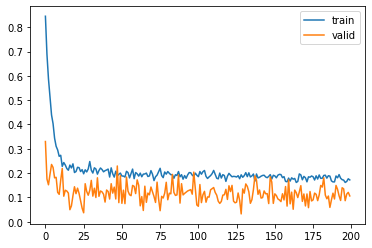

In [101]:
fig, ax = plt.subplots()
ax.plot(mean_train_losses, label='train')
ax.plot(mean_valid_losses, label='valid')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [102]:
model.eval()
test_losses = []
for i, (embeddings, labels) in enumerate(test_loader):
    
    pred = model(embeddings)
    loss = torch.sqrt(loss_fn(pred, labels.view(-1,1)))
    #print("Prediction:", pred.detach().numpy(), " Ground Truth:", labels.view(-1,1))
    test_losses.append(loss.item())
print("average test loss:", np.mean(test_losses))
print("average valid loss:", np.mean(mean_valid_losses))
print("average train loss:", np.mean(mean_train_losses))

average test loss: 0.7266895941325596
average valid loss: 0.11933957296290569
average train loss: 0.20676025260169553


### dropout - 0.5 0.4 0.3 ***
average test loss : 0.7170015105179378
average valid loss: 0.11933957296290569
average train loss: 0.20676025260169553

### dropout - 0.5 0.5 0.5
average test loss: 0.732521082673754
average valid loss: 0.12119727909032788
average train loss: 0.22825816216158137

------------------------------------------------------
### dropout - 0.5 0.3 0.3
average test loss: 0.7378307580947876

### dropout - 0.5 0.3 0.4
average test loss: 0.8221799305507115

### dropout - 0.5 0.4 0.4
average test loss: 0.7620049544743129